In [1]:
import numpy as np 
import pickle
from matplotlib import pyplot as plt
from galpy.util import bovy_coords as coords
import os
import sys
!hostname

/mnt/home/bbhattarai/.local/lib/python3.7/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

pcn-1-38


In [2]:
datapath="/mnt/home/bbhattarai/resonance_sweeping/"




In [3]:
angles=list()
for i in range(1,8+1,1):
    start  = int(i*42)-42
    finish = int(i*42)
    datafilename=str(start)+"_to_"+str(finish)+"_fft_barangles_sim_B3.ang"
    ang_stored = open(datapath+datafilename,'rb')
    all_bangles=pickle.load(ang_stored)
    angles.extend(all_bangles)
    print("Reading form the file...",datafilename)
    #print((all_bangles))

#print(angles)
angles=np.array(angles)

print(angles)

print(len(angles))


datafilename="0_to_336_B3_fft_barangles_combined.ang"

#with open(datapath+datafilename, 'wb') as output:
#    pickle.dump(angles, output)

Reading form the file... 0_to_42_fft_barangles_sim_B3.ang
Reading form the file... 42_to_84_fft_barangles_sim_B3.ang
Reading form the file... 84_to_126_fft_barangles_sim_B3.ang
Reading form the file... 126_to_168_fft_barangles_sim_B3.ang
Reading form the file... 168_to_210_fft_barangles_sim_B3.ang
Reading form the file... 210_to_252_fft_barangles_sim_B3.ang
Reading form the file... 252_to_294_fft_barangles_sim_B3.ang
Reading form the file... 294_to_336_fft_barangles_sim_B3.ang
[-53.46078642  66.0167189  -39.38619139 -28.55665052  24.80376568
  33.98864023 -58.21242611   5.06828755   8.49451696  21.55153057
  70.6844322   63.17907    -21.46203466  -5.92279994  -1.17102884
  48.43689184  56.20439186  54.3029865   55.73503823  54.85909857
  48.35388832  36.76590418  25.03162224  15.8154956   -6.94521055
 -37.6991847  -62.25053527 -87.47341714  61.68738362  27.51284298
  -4.97872405 -35.65963236 -70.87622297  68.24084394  26.82731591
  -9.78026833 -48.61981413  88.56069622  44.75467381   0

In [5]:
datapath="/mnt/home/bbhattarai/B3/"
save_datapath="/mnt/home/bbhattarai/resonance_sweeping/"
plotpath="/mnt/home/bbhattarai/resonance_sweeping/plots/"

i=336

snapshot=i
pfile = open(datapath+'step'+str(snapshot)+'.p', 'rb')
idd,x,y,z,vx,vy,vz,mass=pickle.load(pfile)
#Converting to cylindrical
vr,vphi,vzz=coords.rect_to_cyl_vec(vx,vy,vz,x,y,z)
r,phi,zz=coords.rect_to_cyl(x,y,z)
#converting phi to degrees
#phi=np.rad2deg(phi)

In [ ]:
plt.hexbin(x,y,bins='log')

15.405832894915301


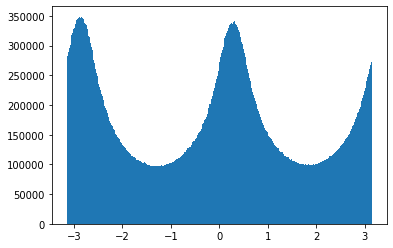

In [6]:
#calculating bar_angle
discindx=(mass<1e-7)
barsample=(r>1)*(r<3)*discindx
#counts, bins, patches=plt.hist(phi[barsample],bins=360,histtype='step')
#bin_centres=bins[:-1]+(bins[1]-bins[0])/2
#max_indx=np.argmax(counts)
#barangle_degrees=bin_centres[max_indx]
#a.append(barangle_degrees)
counts, bins, patches=plt.hist(phi[barsample],bins=360,range=[-np.pi,np.pi])
ff=np.fft.fft(counts-np.mean(counts))
barangle=-np.angle(ff[2])/2.
barangle_degrees=np.rad2deg(barangle)

print(barangle_degrees)   

In [7]:
print(type(angles))
print(type(barangle_degrees))
bd=np.array([barangle_degrees])

print(bd)

<class 'numpy.ndarray'>
<class 'numpy.float64'>
[15.40583289]


In [8]:
c=np.concatenate((angles,bd))
print(len(c))

337


In [9]:
savedatapath="/mnt/home/bbhattarai/resonance_sweeping/"

datafilename="0_to_336_B3_fft_barangles_combined.ang"

#with open(savedatapath+datafilename, 'wb') as output:
#    pickle.dump(c, output)